# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Fathiyya Mufida
- **Email:** mc001d5x2139@student.devacademy.id
- **ID Dicoding:** [MC001D5X2139]

## Menentukan Pertanyaan Bisnis

- Kapan waktu terbaik untuk menambah stok sepeda agar sesuai dengan permintaan?
- Bagaimana tren tahunan dari bulan ke bulan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [21]:
url = "https://raw.githubusercontent.com/fathiyyaa/proyek_dicoding/main/Bike/day.csv"
df_bike_day = pd.read_csv(url)
df_bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
url = "https://raw.githubusercontent.com/fathiyyaa/proyek_dicoding/main/Bike/hour.csv"
df_bike_hour = pd.read_csv(url)
df_bike_hour.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data Bike (DAY)

In [23]:
df_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [24]:
print(df_bike_day.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [25]:
df_bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [26]:
df_bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Data bertipe numerik kecuali pada peubah dteday
- Pada dataset df_bike_hour terdapat peubah hr, sedangkan pada df_bike_day tidak ada

##### Duplicate Data

In [27]:
print("Jumlah duplikasi: ", df_bike_day.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [28]:
df_bike_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


##### Inaccurate value

In [29]:
df_bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
# Check if 'cnt' column equals 'casual' + 'registered'
cnt_check = df_bike_day['cnt'] == df_bike_day['casual'] + df_bike_day['registered']

# If not all values are True, print the rows where the condition is false
if not cnt_check.all():
  print(df_bike_day[~cnt_check])
else:
  print("aman aja")


aman aja


##### Periksa outlier

In [31]:
# Check for outliers using IQR method for numerical features
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for col in numerical_features:
    Q1 = df_bike_day[col].quantile(0.25)
    Q3 = df_bike_day[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_bike_day[(df_bike_day[col] < lower_bound) | (df_bike_day[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers[[col]])  # Print only the outlier values for the current column
    print("-" * 20)


Outliers in temp:
Empty DataFrame
Columns: [temp]
Index: []
--------------------
Outliers in atemp:
Empty DataFrame
Columns: [atemp]
Index: []
--------------------
Outliers in hum:
         hum
49  0.187917
68  0.000000
--------------------
Outliers in windspeed:
     windspeed
44    0.417908
49    0.507463
93    0.385571
94    0.388067
292   0.422275
382   0.415429
407   0.409212
420   0.421642
432   0.441563
433   0.414800
450   0.386821
666   0.398008
721   0.407346
--------------------
Outliers in casual:
     casual
148    2355
183    2282
184    3065
196    2418
246    2521
281    2397
441    3155
447    2469
455    2301
456    2347
462    3252
469    2795
470    2846
476    2541
490    2496
497    2622
504    3410
505    2704
511    2855
512    3283
513    2557
518    2795
519    2494
525    2708
532    2963
533    2634
539    2657
540    2551
550    2562
560    2355
568    2544
581    2345
595    2827
609    2352
610    2613
617    2570
623    3160
630    2512
631    2454
637  

#### Cleaning Data Bike (Day)

In [32]:
df_bike_day[df_bike_day.hum == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [33]:
df_bike_day.hum.replace(0, np.median(df_bike_day.hum), inplace=True)

<ipython-input-33-3b7dc799c447>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bike_day.hum.replace(0, np.median(df_bike_day.hum), inplace=True)


**Insight:**
- Tidak terdapat duplicate data maupun missing values pada dataset
- Peubah humidity bernilai 0 tidak mungkin terjadi di dunia nyata, sehingga dilakukan imputasi dengan median
- outlier yang lain tidak dihapus karena menggambarkan kondisi aktual, jika dihapus dikhawatirkan kehilangan informasi

##### Assesing Data Bike (Hour)

##### Duplicate data

In [34]:
print("Jumlah duplikasi: ", df_bike_hour.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [35]:
df_bike_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


##### Innacurate value

In [36]:
df_bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
# Check if 'cnt' column equals 'casual' + 'registered'
cnt_check = df_bike_hour['cnt'] == df_bike_hour['casual'] + df_bike_hour['registered']

# If not all values are True, print the rows where the condition is false
if not cnt_check.all():
  print(df_bike_hour[~cnt_check])
else:
  print("aman aja")

aman aja


##### Outlier

In [38]:
# Check for outliers using IQR method for numerical features
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for col in numerical_features:
    Q1 = df_bike_day[col].quantile(0.25)
    Q3 = df_bike_day[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_bike_hour[(df_bike_hour[col] < lower_bound) | (df_bike_hour[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers[[col]])  # Print only the outlier values for the current column
    print("-" * 20)

Outliers in temp:
Empty DataFrame
Columns: [temp]
Index: []
--------------------
Outliers in atemp:
Empty DataFrame
Columns: [atemp]
Index: []
--------------------
Outliers in hum:
        hum
1005   0.19
1006   0.15
1029   0.19
1030   0.19
1031   0.19
...     ...
16099  0.18
16100  0.18
16101  0.18
16102  0.16
16103  0.20

[95 rows x 1 columns]
--------------------
Outliers in windspeed:
       windspeed
42        0.4478
48        0.4179
49        0.3881
51        0.3881
54        0.3881
...          ...
17342     0.4179
17343     0.5821
17344     0.6567
17345     0.4627
17347     0.4179

[1341 rows x 1 columns]
--------------------
Outliers in casual:
Empty DataFrame
Columns: [casual]
Index: []
--------------------
Outliers in registered:
Empty DataFrame
Columns: [registered]
Index: []
--------------------
Outliers in cnt:
Empty DataFrame
Columns: [cnt]
Index: []
--------------------


#### Cleaning Data Bike (Hour)

**Insight:**
- Tidak terdapat duplicate data maupun missing values pada dataset
- outlier yang lain tidak dihapus karena menggambarkan kondisi aktual, jika dihapus dikhawatirkan kehilangan informasi
- dataset bike per day dan hour sama saja, hanya pada dataset hour terdapat detail peminjaman per jam
- tidak dilakukan proses cleaning data karena tidak terdapat masalah dalam data

## Exploratory Data Analysis (EDA)



### Explore `df_bike_day`



In [39]:
df_bike_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [40]:
df_bike_day['dteday'] = pd.to_datetime(df_bike_day['dteday'])
df_bike_day.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [41]:
df_bike_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [42]:
# prompt: cek ada nilai apa aja pada weathersit

df_bike_day['weathersit'].unique()


array([2, 1, 3])

In [43]:
df_total = pd.DataFrame({
    "Total Working Days": [df_bike_day[df_bike_day['workingday'] == 1]['cnt'].sum()],
    "Total Holidays": [df_bike_day[df_bike_day['holiday'] == 1]['cnt'].sum()]
})
df_total

,Total Working Days,Total Holidays
0,2292410,78435


In [44]:
# Group data by weekday and sum the 'cnt' column
weekday_counts = df_bike_day.groupby('weekday')['cnt'].sum()
weekday_counts

,cnt
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


In [45]:

# Example: Select data for the year 2011
year_2011_day = df_bike_day[df_bike_day['yr'] == 0]

# Example: Select data for the year 2012
year_2012_day = df_bike_day[df_bike_day['yr'] == 1]

# Print the first few rows of the subsetted data for verification.
print(year_2011_day.head())
print(year_2012_day.head())


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
     instant     dteday  season 

#### Explore `df_bike_hour`

In [46]:
df_bike_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [47]:
df_bike_hour['dteday'] = pd.to_datetime(df_bike_hour['dteday'])
df_bike_hour.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [48]:
df_bike_hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [49]:
# Buat kolom baru berdasarkan rentang waktu
df_bike_hour['time_of_day'] = np.where(
    df_bike_hour['hr'].between(6, 11), 'Pagi',
    np.where(df_bike_hour['hr'].between(12, 17), 'Siang', 'Malam')
)

# Cek hasil
df_bike_hour[['hr', 'time_of_day']].head(10)

,hr,time_of_day
0,0,Malam
1,1,Malam
2,2,Malam
3,3,Malam
4,4,Malam
5,5,Malam
6,6,Pagi
7,7,Pagi
8,8,Pagi
9,9,Pagi


In [50]:
df_total_time = df_bike_hour.groupby("time_of_day").agg(Total=("time_of_day", "count")).reset_index()

# Ubah format agar sesuai dengan bentuk dictionary sebelumnya
df_total_time = df_total_time.set_index("time_of_day").T

# Ubah nama kolom agar sesuai
df_total_time = df_total_time.rename(columns={"Pagi": "Total Pagi", "Siang": "Total Siang", "Malam": "Total Malam"}).fillna(0)

# Urutkan kolom sesuai yang diinginkan
df_total_time = df_total_time.reindex(columns=["Total Pagi", "Total Siang", "Total Malam"])

df_total_time


time_of_day,Total Pagi,Total Siang,Total Malam
Total,4360,4375,8644


In [51]:
rentals_2011 = year_2011_day.groupby(year_2011_day['dteday'].dt.month).agg(casual=("casual", "sum"), registered=("registered", "sum"), total=("cnt", "sum")).reset_index()
rentals_2012 = year_2012_day.groupby(year_2012_day['dteday'].dt.month).agg(casual=("casual", "sum"), registered=("registered", "sum"), total=("cnt", "sum")).reset_index()

In [52]:
rentals_2011

,dteday,casual,registered,total
0,1,3073,35116,38189
1,2,6242,41973,48215
2,3,12826,51219,64045
3,4,22346,72524,94870
4,5,31050,104771,135821
5,6,30612,112900,143512
6,7,36452,104889,141341
7,8,28842,107849,136691
8,9,26545,100873,127418
9,10,25222,98289,123511


In [53]:
rentals_2012

,dteday,casual,registered,total
0,1,8969,87775,96744
1,2,8721,94416,103137
2,3,31618,133257,164875
3,4,38456,135768,174224
4,5,44235,151630,195865
5,6,43294,159536,202830
6,7,41705,161902,203607
7,8,43197,171306,214503
8,9,43778,174795,218573
9,10,34538,164303,198841


**Insight:**
- Pada tahap ini dilakukan eksplorasi data serta persiapan untuk melakukan visualisasi analisis data
- dengan argeagsi ibuat beberapa data frame dan peubah baru, yaitu:
1. df_total: total peminjaman sepeda pada weekdays dan holiday
2. weekday_counts: Menghitung peminjaman sepeda per hari
3. time_of_day: menentukan peminjaman pada pagi/siang/malam
4. df_total_time: total pagi/siang/malam
5. rentals_2011/2012: total peminjaman berdasarkan tahun

## Visualization & Explanatory Analysis

### Pertanyaan 1:Kapan waktu terbaik untuk menambah stok sepeda agar sesuai dengan permintaan?

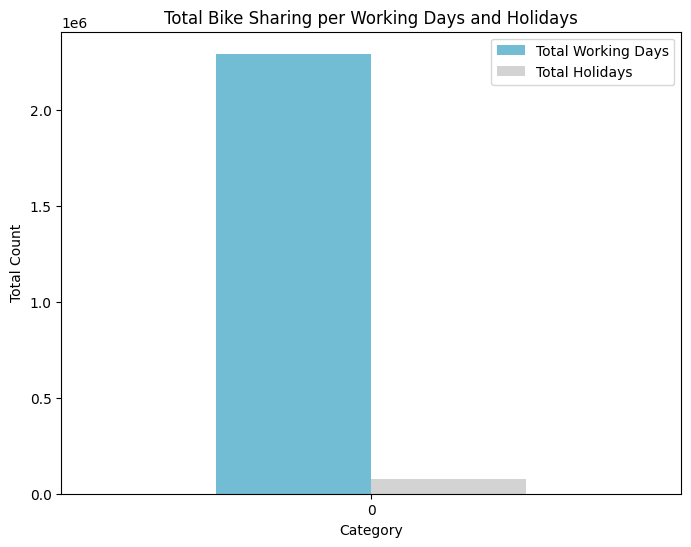

In [54]:

ax = df_total.plot(kind='bar', figsize=(8, 6), color=["#72BCD4", "#D3D3D3"])

plt.title('Total Bike Sharing per Working Days and Holidays')
plt.ylabel('Total Count')
plt.xlabel('Category')
plt.xticks(rotation=0)  # Tidak memutar label x-axis

plt.show()

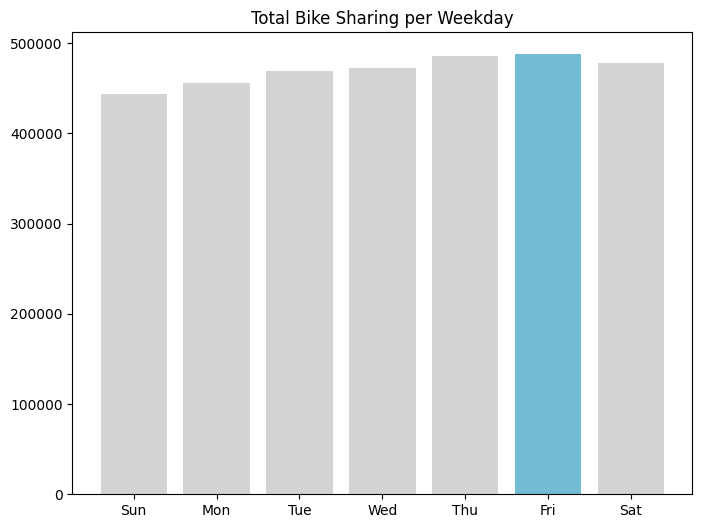

In [55]:
# Cari nilai maksimum
max_value = weekday_counts.max()

# Buat warna: merah untuk nilai maksimum, biru untuk lainnya
colors = ["#72BCD4" if value == max_value else "#D3D3D3" for value in weekday_counts.values]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(weekday_counts.index, weekday_counts.values, color=colors)

plt.title('Total Bike Sharing per Weekday')

# Pastikan label weekday tampil dengan benar
plt.xticks(ticks=weekday_counts.index, labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

plt.show()

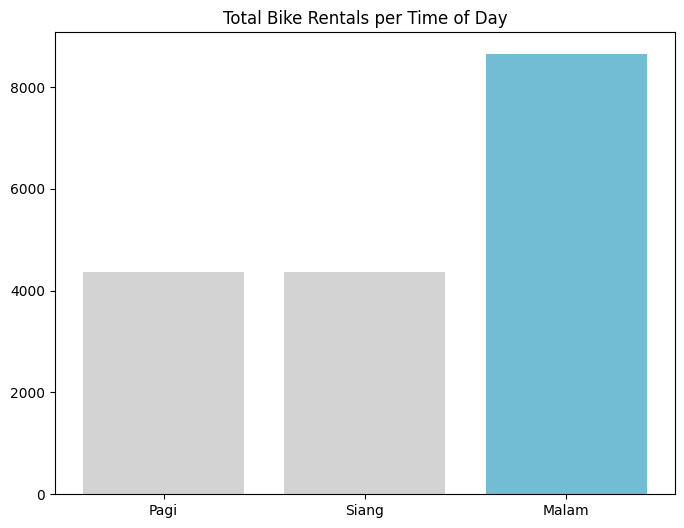

In [56]:
# Cari nilai maksimum dari seluruh dataframe
max_value = df_total_time.max().max()

# Buat warna: biru untuk nilai maksimum, abu-abu untuk lainnya
colors = ["#72BCD4" if value == max_value else "#D3D3D3" for value in df_total_time.iloc[0]]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_total_time.columns, df_total_time.iloc[0], color=colors)

plt.title('Total Bike Rentals per Time of Day')

# Pastikan label kategori tampil dengan benar
plt.xticks(ticks=range(len(df_total_time.columns)), labels=['Pagi','Siang','Malam'])

plt.show()

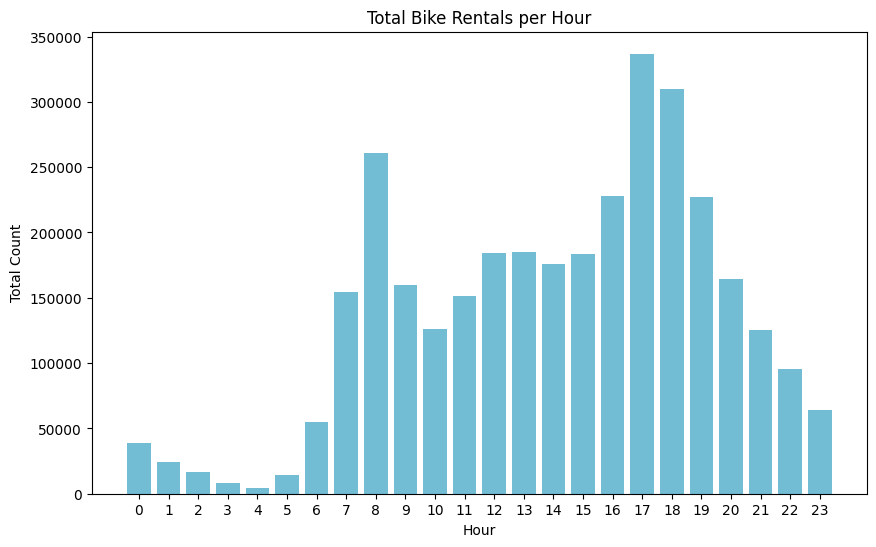

In [57]:
# Group data by hour and sum 'cnt'
hourly_counts = df_bike_hour.groupby('hr')['cnt'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='#72BCD4')
plt.title('Total Bike Rentals per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.xticks(hourly_counts.index)  # Show all hour ticks
plt.show()


**Insight:**
- Bike sharing lebih sering dilakukan pada hari kerja
- Total peminjaman sepeda hampir setiap harinya
- Peminjaman paling sering terjadi saat malam hari, dengan puncak pada jam 5 dan 6


### Pertanyaan 2: Bagaimana tren tahunan dari bulan ke bulan?

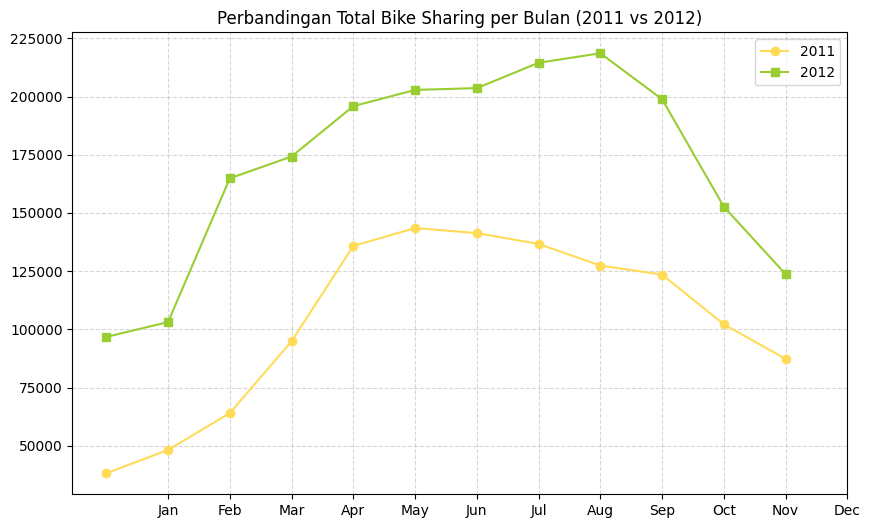

In [58]:
# Buat plot
plt.figure(figsize=(10, 6))

# Ganti 'total' dengan 'total_col' yang sudah didefinisikan sebelumnya
plt.plot(rentals_2011['total'].index, rentals_2011['total'].values, marker='o', linestyle='-', color='#FFDB58', label='2011')
plt.plot(rentals_2012['total'].index, rentals_2012['total'].values, marker='s', linestyle='-', color='#9ACD32', label='2012')

plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Perbandingan Total Bike Sharing per Bulan (2011 vs 2012)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Insight:**
- Terdapat peningkatan bike sharing dari tahun 2011 ke 2012
- Pada 2012 puncak terjadi pada bulan september, sedangkan di tahun 2011 terdapat penurunan pada bulan tersebut
- baik pada tahun 2011 terdapat peningkatan signifikan pada bulan januari-may
- baik pada tahun 2011 terdapat penurunan signifikan pada bulan oktober-desember

## Analisis Lanjutan (Opsional)

Beberapa analisis lanjutan dapat dilakukan dengan regresi untuk melihat peubah mana saja yang berpengaruh signifikan terhadap jumlah orang yang menyewa sepeda. Selain itu, bisa dilakukan peramalan jumlah penyewa menggunakan ARIMA atau metode forecast lainnya.

## Conclusion

 - Waktu terbaik untuk menambah stok sepeda adalah pada jam 4 sore saat hari kerja, karena puncak peminjaman akan terjadi pada jam 5-6 sore. Hal ini menunjukkan bahwa banyak pengguna memanfaatkan sepeda setelah jam kerja, kemungkinan untuk pulang ke rumah atau aktivitas lainnya. Oleh karena itu, pengelola sistem peminjaman sepeda dapat mempertimbangkan untuk meningkatkan jumlah unit yang tersedia pada sore hari untuk menghindari kekurangan stok.  

- Tren per bulan pada 2011 dan 2012 sedikit berbeda, tetapi memiliki pola serupa dengan peningkatan peminjaman pada bulan Januari–Mei dan penurunan pada Oktober–Desember. Hal ini mungkin disebabkan oleh faktor cuaca, musim liburan, atau perubahan kebiasaan pengguna. Perlu dilakukan analisis lebih lanjut mengenai faktor apa saja yang berpengaruh, dapat dilakukan dengan regresi atau metode lainnya. Strategi promosi dapat difokuskan pada akhir tahun untuk meningkatkan minat pengguna, misalnya dengan memberikan diskon atau program loyalitas pada bulan Oktober–Desember.  